# <center>Project Code File</center>

**NOTE:** This file contains code for cleaning transcripts, performing clustering, analysis over time, and sentiment analysis.

In [21]:
import pandas as pd

In [22]:
main = pd.read_csv('ted_main.csv')
main.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [23]:
transcript_path = '/content/drive/MyDrive/PhD/Year1/574/projects/transcripts.csv'

In [24]:
transcript = pd.read_csv('transcripts.csv')
transcript.head()

,transcript,url
0,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...
1,"Thank you so much, Chris. And it's truly a gre...",https://www.ted.com/talks/al_gore_on_averting_...
2,"(Music: ""The Sound of Silence,"" Simon & Garfun...",https://www.ted.com/talks/david_pogue_says_sim...
3,If you're here today — and I'm very happy that...,https://www.ted.com/talks/majora_carter_s_tale...
4,"About 10 years ago, I took on the task to teac...",https://www.ted.com/talks/hans_rosling_shows_t...


In [25]:
transcript.shape

(2467, 2)

In [26]:
main.shape

(2550, 17)

In [27]:
# to check the number of talks in each month

l = ['01','02','03','04','05','06','07','08','09','10','11','12']

d_l = dict.fromkeys(l,0)

x = pd.to_datetime(main['published_date']).dt.strftime('%m')

for i in x:
    d_l[i] += 1
        
d_l

{'01': 2550,
 '02': 0,
 '03': 0,
 '04': 0,
 '05': 0,
 '06': 0,
 '07': 0,
 '08': 0,
 '09': 0,
 '10': 0,
 '11': 0,
 '12': 0}

## Change UNIX date to datetime format

In [28]:
from datetime import datetime as dt

In [29]:
# This code was referenced from the below link: 
# https://stackoverflow.com/questions/3682748/converting-unix-timestamp-string-to-readable-date

def unix_to_date(i):
    main[i] = main[i].apply(lambda x: dt.utcfromtimestamp(x).strftime('%Y-%m-%d'))
    return None

unix_to_date('film_date')
unix_to_date('published_date')

main.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,2006-02-25,43,Al Gore,Al Gore: Averting the climate crisis,1,2006-06-27,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,2006-02-24,26,David Pogue,David Pogue: Simplicity sells,1,2006-06-27,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,2006-02-26,35,Majora Carter,Majora Carter: Greening the ghetto,1,2006-06-27,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,2006-02-22,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,2006-06-27,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


## Most Viewed and Most Comments

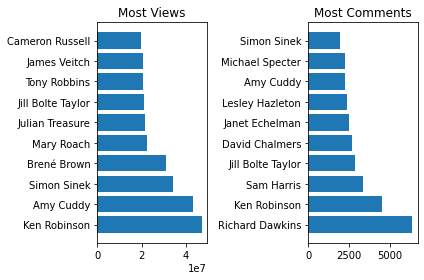

In [30]:
import matplotlib.pyplot as plt

most_views = main.sort_values(by=['views'], ascending=False).head(n=10)
most_comms = main.sort_values(by=['comments'], ascending=False).head(n=10)

fig, ax = plt.subplots(1,2)

ax[0].barh(most_views['main_speaker'], most_views['views'])
ax[1].barh(most_comms['main_speaker'], most_comms['comments'])
ax[0].set_title('Most Views')
ax[1].set_title('Most Comments')
fig.tight_layout()

plt.show()

## Time Analysis (Year)

In [31]:
import matplotlib.pyplot as plt

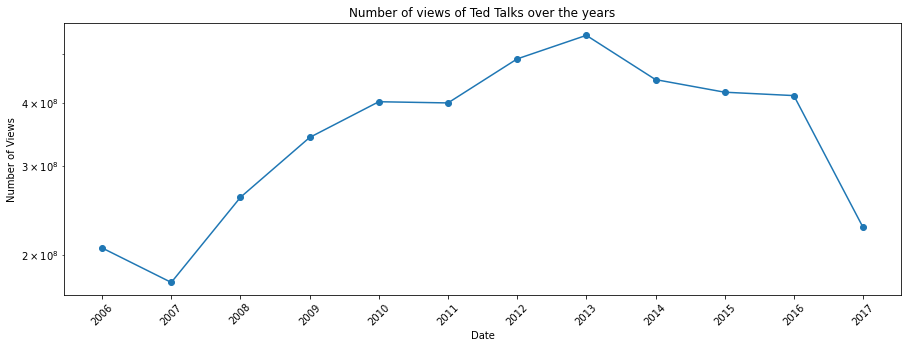

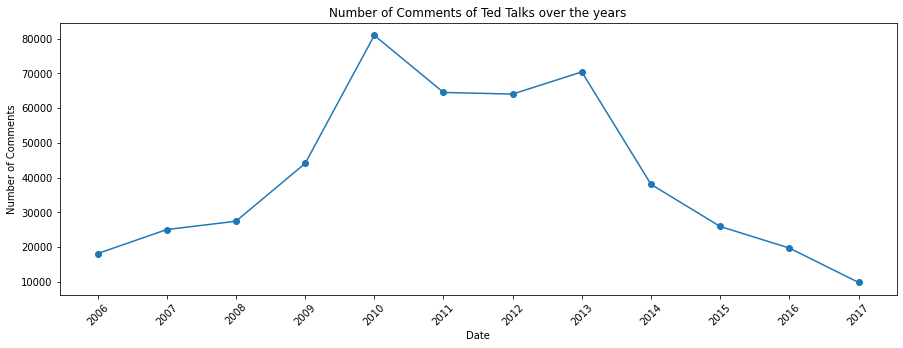

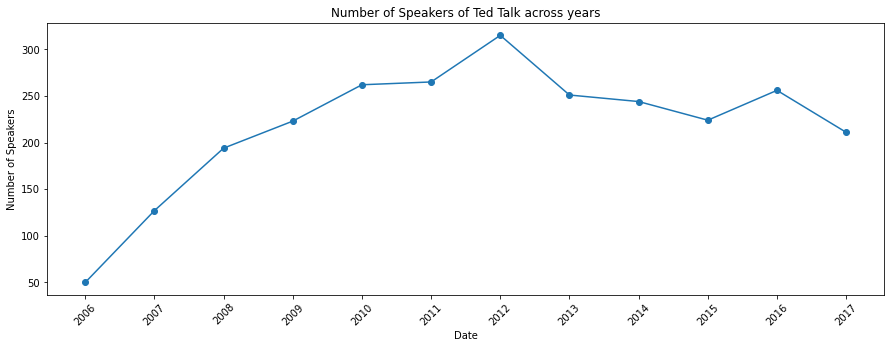

In [32]:
df = main.groupby(pd.to_datetime(main['published_date']).dt.year).sum()

dates = []
for i in range(2006,2018):
    dates.append(i)
    

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df.index.values, df['views'], marker='o')
ax.set(xlabel="Date", ylabel="Number of Views", title="Number of views of Ted Talks over the years")
plt.xticks(dates, rotation=45)
plt.yscale(value='log')


fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df.index.values, df['comments'], marker='o')
ax.set(xlabel="Date", ylabel="Number of Comments", title="Number of Comments of Ted Talks over the years")
plt.xticks(dates, rotation=45)



fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df.index.values, df['num_speaker'], marker='o')
ax.set(xlabel="Date", ylabel="Number of Speakers", title="Number of Speakers of Ted Talk across years")
plt.xticks(dates, rotation=45)

plt.show()

## Time Analysis (Month)

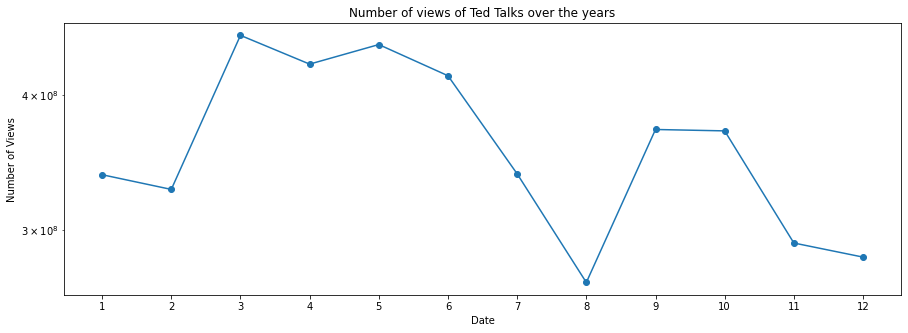

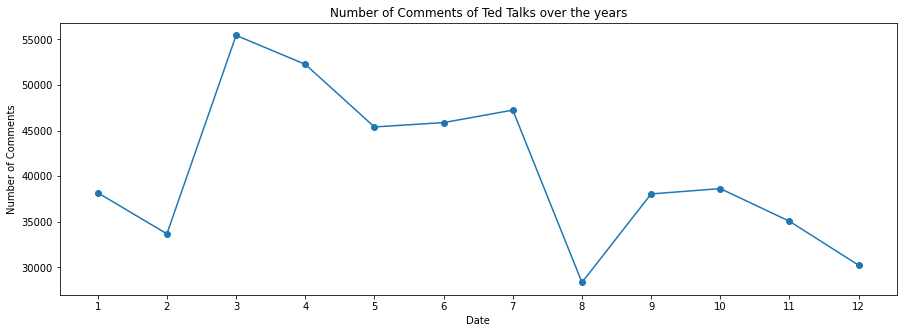

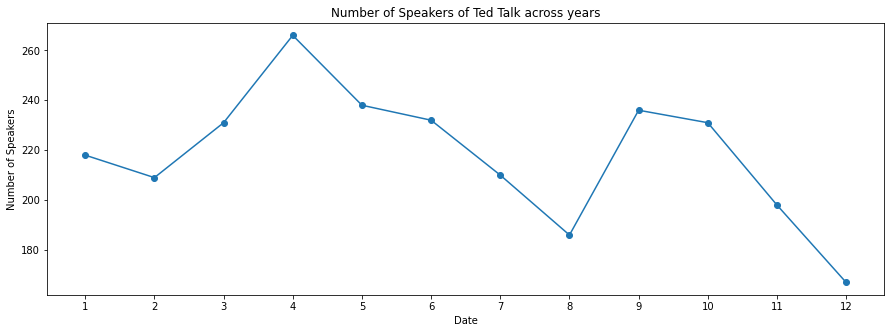

In [33]:
df_month = main.groupby(pd.to_datetime(main['published_date']).dt.month).sum()

dates = []
for i in range(1,13):
    dates.append(i)

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df_month.index.values, df_month['views'], marker='o')
ax.set(xlabel="Date", ylabel="Number of Views", title="Number of views of Ted Talks over the years")
plt.xticks(dates)
plt.yscale(value='log')


fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df_month.index.values, df_month['comments'], marker='o')
ax.set(xlabel="Date", ylabel="Number of Comments", title="Number of Comments of Ted Talks over the years")
plt.xticks(dates)



fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df_month.index.values, df_month['num_speaker'], marker='o')
ax.set(xlabel="Date", ylabel="Number of Speakers", title="Number of Speakers of Ted Talk across years")
plt.xticks(dates)

plt.show()

## Cleaning Transcripts

In [34]:
ted = pd.merge(main, transcript, on='url')
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,transcript
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,Good morning. How are you?(Laughter)It's been ...
1,265,With the same humor and humanity he exuded in ...,977,TED2006,2006-02-25,43,Al Gore,Al Gore: Averting the climate crisis,1,2006-06-27,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,"Thank you so much, Chris. And it's truly a gre..."
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,2006-02-24,26,David Pogue,David Pogue: Simplicity sells,1,2006-06-27,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,2006-02-26,35,Majora Carter,Majora Carter: Greening the ghetto,1,2006-06-27,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,If you're here today — and I'm very happy that...
4,593,You've never seen data presented like this. Wi...,1190,TED2006,2006-02-22,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,2006-06-27,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,"About 10 years ago, I took on the task to teac..."


In [35]:
import re, string

In [36]:
# This code was reused from class coursework - IMT 547 at University of Washington (iSchool)

def clean_text_round1(text):
    text = text.lower()
    text = re.sub('\(.*?\)', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('—', ' ', text)
    return text

round1 = lambda x: clean_text_round1(x)

data_clean1 = pd.DataFrame(ted.transcript.apply(round1))
data_clean1

,transcript
0,good morning how are you it s been great has...
1,thank you so much chris and it s truly a gre...
2,hello voice mail my old friend i ve called fo...
3,if you re here today and i m very happy that...
4,about years ago i took on the task to teach ...
...,...
2462,so ma was trying to explain something to me a...
2463,this is a picture of a sunset on mars taken by...
2464,in my early days as a graduate student i went...
2465,i took a cell phone and accidentally made myse...


In [37]:
# This code was reused from class coursework - IMT 547 at University of Washington (iSchool)

def clean_text_round2(text):
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    text = text.strip()
    text.replace(' ', '')
    return text

round2 = lambda x: clean_text_round2(x)

data_clean2 = pd.DataFrame(data_clean1.transcript.apply(round2))
data_clean2

,transcript
0,good morning how are you it s been great has...
1,thank you so much chris and it s truly a gre...
2,hello voice mail my old friend i ve called fo...
3,if you re here today and i m very happy that...
4,about years ago i took on the task to teach ...
...,...
2462,so ma was trying to explain something to me a...
2463,this is a picture of a sunset on mars taken by...
2464,in my early days as a graduate student i went...
2465,i took a cell phone and accidentally made myse...


In [38]:
def clean_text_round3(text):
    text = re.sub(" +", " ",text)    
    return text

round3 = lambda x: clean_text_round3(x)

data_clean3 = pd.DataFrame(data_clean2.transcript.apply(round3))
data_clean3

,transcript
0,good morning how are you it s been great hasn ...
1,thank you so much chris and it s truly a great...
2,hello voice mail my old friend i ve called for...
3,if you re here today and i m very happy that y...
4,about years ago i took on the task to teach gl...
...,...
2462,so ma was trying to explain something to me ab...
2463,this is a picture of a sunset on mars taken by...
2464,in my early days as a graduate student i went ...
2465,i took a cell phone and accidentally made myse...


In [39]:
transcript['transcript'][:6]

0    Good morning. How are you?(Laughter)It's been ...
1    Thank you so much, Chris. And it's truly a gre...
2    (Music: "The Sound of Silence," Simon & Garfun...
3    If you're here today — and I'm very happy that...
4    About 10 years ago, I took on the task to teac...
5    Thank you. I have to tell you I'm both challen...
Name: transcript, dtype: object

In [40]:
ted_transcript = data_clean3
ted_transcript.index = ted.name
ted_transcript

,transcript
name,
Ken Robinson: Do schools kill creativity?,good morning how are you it s been great hasn ...
Al Gore: Averting the climate crisis,thank you so much chris and it s truly a great...
David Pogue: Simplicity sells,hello voice mail my old friend i ve called for...
Majora Carter: Greening the ghetto,if you re here today and i m very happy that y...
Hans Rosling: The best stats you've ever seen,about years ago i took on the task to teach gl...
...,...
Duarte Geraldino: What we're missing in the debate about immigration,so ma was trying to explain something to me ab...
Armando Azua-Bustos: The most Martian place on Earth,this is a picture of a sunset on mars taken by...
Radhika Nagpal: What intelligent machines can learn from a school of fish,in my early days as a graduate student i went ...


## Creating Features

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [42]:
tfidf_vectorizer = TfidfVectorizer(strip_accents='ascii', stop_words='english', max_df=0.8)
tfidf_matrix = tfidf_vectorizer.fit_transform(ted_transcript['transcript'])

In [43]:
tfidf_matrix.shape

(2467, 57052)

In [44]:
terms = tfidf_vectorizer.get_feature_names()
terms[:10]

['aa',
 'aaa',
 'aaaa',
 'aaaaa',
 'aaaaaaaah',
 'aaaaaaaargh',
 'aaaaaaah',
 'aaaaaah',
 'aaaaaas',
 'aaaab']

## K-Means Clustering

In [45]:
from sklearn.cluster import KMeans

In [46]:
kmeans = KMeans(n_clusters=15)
y_kmeans = kmeans.fit_predict(tfidf_matrix)

In [47]:
print(y_kmeans)

[ 2  1  9 ... 14  9  7]


In [48]:
ted['cluster'] = y_kmeans

In [49]:
ls = []

names = {str(k): [] for k in range(0,15)}         


for i, r in ted.iterrows():
    x = str(r['cluster'])
    names[x].append(r['name'])
    
names

{'0': ['Steven Levitt: Surprising stats about child carseats',
  'Shimon Schocken: What a bike ride can teach you',
  'Kim Gorgens: Protecting the brain against concussion',
  'Tom Thum: The orchestra in my mouth',
  'David Epstein: Are athletes really getting faster, better, stronger?',
  'Adam Savage: My love letter to cosplay',
  "David Camarillo: Why helmets don't prevent concussions -- and what might",
  'Amanda Palmer, Jherek Bischoff, Usman Riaz: "Space Oddity"'],
 '1': ['Al Gore: Averting the climate crisis',
  'Amy Smith: Simple designs to save a life',
  'Ben Saunders: Why did I ski to the North Pole?',
  'E.O. Wilson: My wish: Build the Encyclopedia of Life',
  "Janine Benyus: Biomimicry's surprising lessons from nature's engineers",
  'Sheila Patek: The shrimp with a kick!',
  "Jeff Bezos: The electricity metaphor for the web's future",
  'Natalie MacMaster: Cape Breton fiddling in reel time',
  'Tierney Thys: Swim with the giant sunfish',
  "Bill Stone: I'm going to the mo

In [50]:
ted['cluster'].value_counts()

3     695
9     331
8     272
1     266
6     242
2     113
13    101
7      97
5      79
12     79
11     64
4      51
10     36
14     33
0       8
Name: cluster, dtype: int64

In [51]:
import random

In [52]:
# code referenced form the below link:
# http://brandonrose.org/clustering

clusters=15

order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

for i in range(15):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    print('Top Words in Cluster {}: {}'.format(i, ', '.join(top_ten_words)))
    print()
    print('Ted Talk Names:', random.sample(names[str(i)],5))
    print()
    print()

Top Words in Cluster 0: concussion, tom, helmet, car, costume

Ted Talk Names: ['Amanda Palmer, Jherek Bischoff, Usman Riaz: "Space Oddity"', 'Shimon Schocken: What a bike ride can teach you', "David Camarillo: Why helmets don't prevent concussions -- and what might", 'Kim Gorgens: Protecting the brain against concussion', 'Tom Thum: The orchestra in my mouth']


Top Words in Cluster 1: water, energy, oil, food, ocean

Ted Talk Names: ['Neri Oxman: Design at the intersection of technology and biology', 'Saul Griffith: High-altitude wind energy from kites!', 'Hadyn Parry: Re-engineering mosquitos to fight disease', 'Zaria Forman: Drawings that show the beauty and fragility of Earth', 'Marcin Jakubowski: Open-sourced blueprints for civilization']


Top Words in Cluster 2: kids, school, children, students, education

Ted Talk Names: ['Kiran Sethi: Kids, take charge', 'Ramsey Musallam: 3 rules to spark learning', 'Ellen  Gustafson: Obesity + hunger = 1 global food issue', 'Philip K. Howard

In [53]:
clust_ted = ted.groupby('cluster').sum()
clust_ted

,comments,duration,languages,num_speaker,views
cluster,,,,,
0,743,6351,216,10,16919821
1,45341,209291,7227,272,337862192
2,32979,97861,3547,114,290127551
3,115432,473453,21172,720,1235210699
4,6395,47443,1333,51,64888349
5,23978,69826,2381,80,181315671
6,50502,232236,6233,248,303757330
7,13694,84928,2430,97,99543454
8,81299,260671,7909,278,758550088


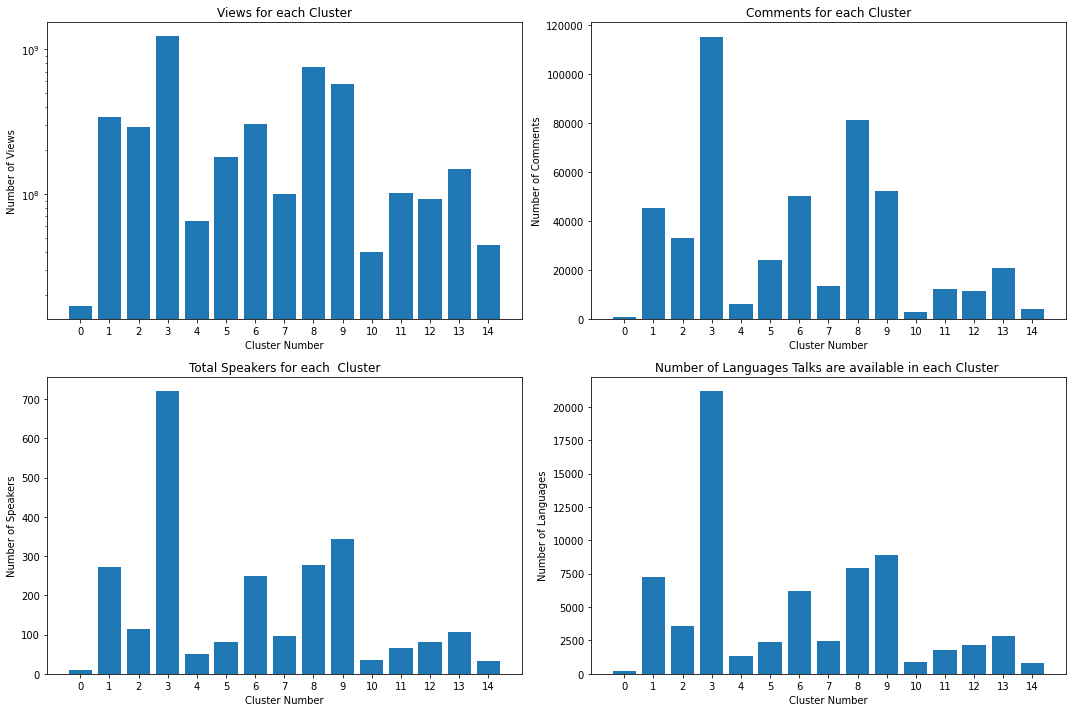

In [54]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.bar(clust_ted.index.values, clust_ted['views'])
ax2.bar(clust_ted.index.values, clust_ted['comments'])
ax3.bar(clust_ted.index.values, clust_ted['num_speaker'])
ax4.bar(clust_ted.index.values, clust_ted['languages'])

ax1.set_yscale('log')

ax1.set_xlabel('Cluster Number')
ax2.set_xlabel('Cluster Number')
ax3.set_xlabel('Cluster Number')
ax4.set_xlabel('Cluster Number')

ax1.set_ylabel('Number of Views')
ax2.set_ylabel('Number of Comments')
ax3.set_ylabel('Number of Speakers')
ax4.set_ylabel('Number of Languages')

ax1.set_title('Views for each Cluster')
ax2.set_title('Comments for each Cluster')
ax3.set_title('Total Speakers for each  Cluster')
ax4.set_title('Number of Languages Talks are available in each Cluster ')

ticks= []
for i in range(0,15):
    ticks.append(i)
    
plt.setp(ax1, xticks=ticks)
plt.setp(ax2, xticks=ticks)
plt.setp(ax3, xticks=ticks)
plt.setp(ax4, xticks=ticks)

plt.tight_layout()
plt.show()



In [55]:
row_headers = []
for i in range(0,15):
    row_headers.append(f'Cluster {i}')
    

ticks= []
for i in range(0,15):
    ticks.append(i)
    
clust = pd.DataFrame(columns=['Words'], index=ticks)
clust

,Words
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


In [56]:
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

for i in range(15):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    clust['Words'][i] = top_ten_words
    
clust.index = row_headers
clust

,Words
Cluster 0,"[concussion, tom, helmet, car, costume]"
Cluster 1,"[water, energy, oil, food, ocean]"
Cluster 2,"[kids, school, children, students, education]"
Cluster 3,"[want, life, actually, right, things]"
Cluster 4,"[africa, african, hiv, countries, continent]"
Cluster 5,"[brain, neurons, cells, consciousness, brains]"
Cluster 6,"[government, countries, global, percent, country]"
Cluster 7,"[city, cities, building, buildings, architecture]"
Cluster 8,"[said, life, say, love, want]"
Cluster 9,"[actually, things, data, music, kind]"


## Sentiment Analysis

In [59]:
!pip install vaderSentiment

     |████████████████████████████████| 133kB 6.5MB/s 


In [60]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [61]:
analyzer = SentimentIntensityAnalyzer()

In [62]:
def polarity_func(row):
    score = analyzer.polarity_scores(row)
    if score['compound'] >= 0.05:
        return 'Positive Sentiment'
    elif score['compound'] < (-0.05):
        return 'Negative Sentiment'
    else:
        return 'Neutral Sentiment'
    

polarity = pd.DataFrame(ted_transcript.transcript.apply(lambda x: polarity_func(x)))

In [63]:
l = []
for i, r in polarity.iterrows():
    l.append(r['transcript'])

ted['sentiment'] = l

In [64]:
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,transcript,cluster,sentiment
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,Good morning. How are you?(Laughter)It's been ...,2,Positive Sentiment
1,265,With the same humor and humanity he exuded in ...,977,TED2006,2006-02-25,43,Al Gore,Al Gore: Averting the climate crisis,1,2006-06-27,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,"Thank you so much, Chris. And it's truly a gre...",1,Positive Sentiment
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,2006-02-24,26,David Pogue,David Pogue: Simplicity sells,1,2006-06-27,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,"(Music: ""The Sound of Silence,"" Simon & Garfun...",9,Positive Sentiment
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,2006-02-26,35,Majora Carter,Majora Carter: Greening the ghetto,1,2006-06-27,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,If you're here today — and I'm very happy that...,7,Positive Sentiment
4,593,You've never seen data presented like this. Wi...,1190,TED2006,2006-02-22,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,2006-06-27,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,"About 10 years ago, I took on the task to teac...",4,Positive Sentiment


In [65]:
cnt = ted.groupby('sentiment').count()
cnt

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,transcript,cluster
sentiment,,,,,,,,,,,,,,,,,,,
Negative Sentiment,286,286,286,286,286,286,286,286,286,286,286,286,285,286,286,286,286,286,286
Neutral Sentiment,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
Positive Sentiment,2173,2173,2173,2173,2173,2173,2173,2173,2173,2173,2173,2173,2168,2173,2173,2173,2173,2173,2173


In [66]:
pol = ted.groupby('sentiment').sum()
pol

,comments,duration,languages,num_speaker,views,cluster
sentiment,,,,,,
Negative Sentiment,59396,229376,8076,293,467765619,1662
Neutral Sentiment,611,3630,311,9,10543328,24
Positive Sentiment,415065,1794276,61408,2234,3814999905,12563


Text(0.5, 1.0, 'Sentiment of the Ted Talk')

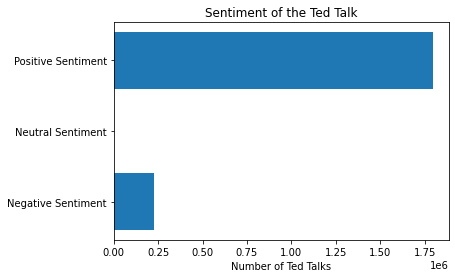

In [67]:
fig, ax = plt.subplots()

ax.barh(pol.index.values, pol.duration)
ax.set_xlabel('Number of Ted Talks')
ax.set_title('Sentiment of the Ted Talk')

In [68]:
def sent_func(row):
    score = analyzer.polarity_scores(row)
    return score['compound']
    

sent = pd.DataFrame(ted_transcript.transcript.apply(lambda x: sent_func(x)))

l = []
for i, r in sent.iterrows():
    l.append(r['transcript'])

ted['VADER_compund_score'] = l
ted

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,transcript,cluster,sentiment,VADER_compund_score
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,Good morning. How are you?(Laughter)It's been ...,2,Positive Sentiment,0.9999
1,265,With the same humor and humanity he exuded in ...,977,TED2006,2006-02-25,43,Al Gore,Al Gore: Averting the climate crisis,1,2006-06-27,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,"Thank you so much, Chris. And it's truly a gre...",1,Positive Sentiment,0.9995
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,2006-02-24,26,David Pogue,David Pogue: Simplicity sells,1,2006-06-27,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,"(Music: ""The Sound of Silence,"" Simon & Garfun...",9,Positive Sentiment,0.9998
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,2006-02-26,35,Majora Carter,Majora Carter: Greening the ghetto,1,2006-06-27,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,If you're here today — and I'm very happy that...,7,Positive Sentiment,0.9998
4,593,You've never seen data presented like this. Wi...,1190,TED2006,2006-02-22,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,2006-06-27,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,"About 10 years ago, I took on the task to teac...",4,Positive Sentiment,0.9996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2462,17,"Between 2008 and 2016, the United States depor...",476,TED2017,2017-06-06,4,Duarte Geraldino,Duarte Geraldino: What we're missing in the de...,1,2017-09-19,"[{'id': 3, 'name': 'Courageous', 'count': 24},...","[{'id': 2596, 'hero': 'https://pe.tedcdn.com/i...",Journalist,"['TED Residency', 'United States', 'community'...",What we're missing in the debate about immigra...,https://www.ted.com/talks/duarte_geraldino_wha...,450430,"So, Ma was trying to explain something to me a...",6,Negative Sentiment,-0.9387
2463,6,How can you study Mars without a spaceship? He...,290,TED2017,2017-04-24,3,Armando Azua-Bustos,Armando Azua-Bustos: The most Martian place on...,1,2017-09-20,"[{'id': 22, 'name': 'Fascinating', 'count': 32...","[{'id': 2491, 'hero': 'https://pe.tedcdn.com/i...",Astrobiologist,"['Mars', 'South America', 'TED Fellows', 'astr...",The most Martian place on Earth,https://www.ted.com/talks/armando_azua_bustos_...,417470,This is a picture of a sunset on Mars taken by...,10,Positive Sentiment,0.9892
2464,10,Science fiction visions of the future show us ...,651,TED2017,2017-04-24,1,Radhika Nagpal,Radhika Nagpal: What intelligent machines can ...,1,2017-09-21,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...","[{'id': 

In [69]:
ted['date'] = pd.to_datetime(ted['published_date']).dt.strftime('%Y-%m')
ted

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,transcript,cluster,sentiment,VADER_compund_score,date
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,Good morning. How are you?(Laughter)It's been ...,2,Positive Sentiment,0.9999,2006-06
1,265,With the same humor and humanity he exuded in ...,977,TED2006,2006-02-25,43,Al Gore,Al Gore: Averting the climate crisis,1,2006-06-27,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,"Thank you so much, Chris. And it's truly a gre...",1,Positive Sentiment,0.9995,2006-06
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,2006-02-24,26,David Pogue,David Pogue: Simplicity sells,1,2006-06-27,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,"(Music: ""The Sound of Silence,"" Simon & Garfun...",9,Positive Sentiment,0.9998,2006-06
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,2006-02-26,35,Majora Carter,Majora Carter: Greening the ghetto,1,2006-06-27,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,If you're here today — and I'm very happy that...,7,Positive Sentiment,0.9998,2006-06
4,593,You've never seen data presented like this. Wi...,1190,TED2006,2006-02-22,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,2006-06-27,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,"About 10 years ago, I took on the task to teac...",4,Positive Sentiment,0.9996,2006-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2462,17,"Between 2008 and 2016, the United States depor...",476,TED2017,2017-06-06,4,Duarte Geraldino,Duarte Geraldino: What we're missing in the de...,1,2017-09-19,"[{'id': 3, 'name': 'Courageous', 'count': 24},...","[{'id': 2596, 'hero': 'https://pe.tedcdn.com/i...",Journalist,"['TED Residency', 'United States', 'community'...",What we're missing in the debate about immigra...,https://www.ted.com/talks/duarte_geraldino_wha...,450430,"So, Ma was trying to explain something to me a...",6,Negative Sentiment,-0.9387,2017-09
2463,6,How can you study Mars without a spaceship? He...,290,TED2017,2017-04-24,3,Armando Azua-Bustos,Armando Azua-Bustos: The most Martian place on...,1,2017-09-20,"[{'id': 22, 'name': 'Fascinating', 'count': 32...","[{'id': 2491, 'hero': 'https://pe.tedcdn.com/i...",Astrobiologist,"['Mars', 'South America', 'TED Fellows', 'astr...",The most Martian place on Earth,https://www.ted.com/talks/armando_azua_bustos_...,417470,This is a picture of a sunset on Mars taken by...,10,Positive Sentiment,0.9892,2017-09
2464,10,Science fiction visions of the future show us ...,651,TED2017,2017-04-24,1,Radhika Nagpal,Radhika Nagpal: What intelligent machines can ...,1,2017-09

In [70]:
vader_score = ted.groupby(pd.to_datetime(ted['date'])).mean()
vader_score

,comments,duration,languages,num_speaker,views,cluster,VADER_compund_score
date,,,,,,,
2006-06-01,1067.833333,1173.000000,41.333333,1.000000,1.440879e+07,5.166667,0.999733
2006-07-01,417.428571,1348.428571,26.285714,1.000000,1.813473e+06,6.571429,0.715129
2006-08-01,164.900000,1104.300000,26.900000,1.000000,2.044358e+06,7.300000,0.999660
2006-09-01,471.875000,1233.250000,33.875000,1.000000,6.119034e+06,8.125000,0.998538
2006-10-01,137.545455,1275.454545,24.272727,1.000000,1.068860e+06,6.454545,0.812655
...,...,...,...,...,...,...,...
2017-05-01,64.636364,785.772727,16.818182,1.045455,1.235729e+06,6.000000,0.623545
2017-06-01,33.157895,789.631579,15.789474,1.052632,1.271543e+06,5.000000,0.798500
2017-07-01,34.500000,743.812500,10.937500,1.000000,1.212470e+06,6.562500,0.873369


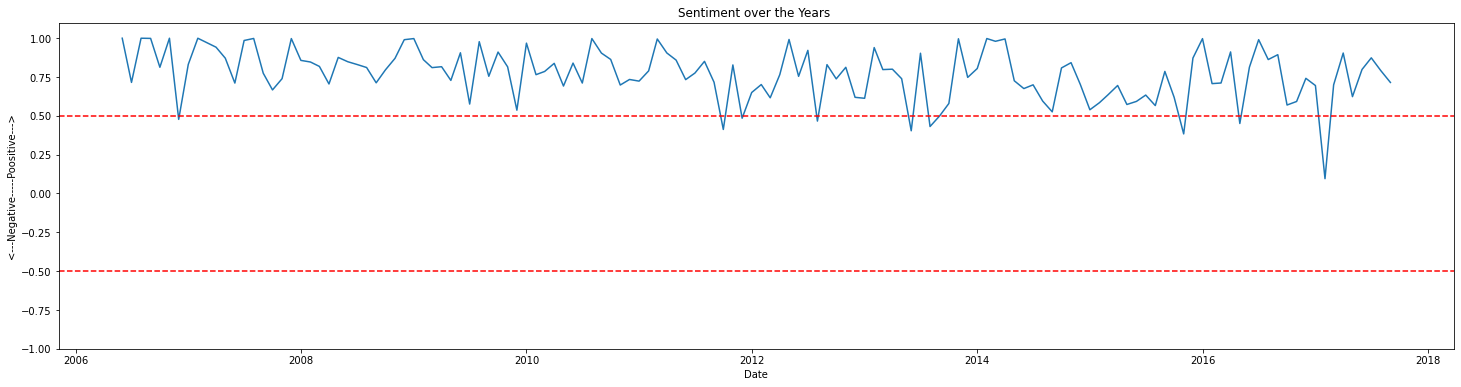

In [71]:
plt.figure(figsize=(25,6))
plt.plot(vader_score.index.values, vader_score['VADER_compund_score'])
plt.xlabel('Date')
plt.ylabel('<---Negative-----Poositive--->')
plt.title('Sentiment over the Years ')
plt.ylim(-1,1.1)

plt.axhline(y=-0.50, color='r', linestyle ='--')
plt.axhline(y=0.50, color='r', linestyle ='--')